¡Hola, Arnold!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Arnold! Has hecho un excelente trabajo al realizar con el desarrollo del proyecto, realizas un tratamiento inicial a los datos, el filtro de estos y las pruebas indicadas. Solamente te dejo algunos comentarios para terminar de complementar el análisis

Sigue con el excelente trabajo!
</div>

Objetivos del estudio

Verificar la validez de la prueba A/B

Confirmar que la segmentación y asignación de usuarios a los grupos A y B fue correcta.

Asegurar que no haya sesgos (ej. usuarios en ambos grupos, fechas fuera del rango, regiones incorrectas).

Analizar la conversión en el embudo

Medir la conversión en las etapas:
product_page → product_cart → purchase.

Comparar los resultados entre el grupo A (control) y el grupo B (nuevo embudo con recomendaciones).

Evaluar el impacto del cambio

Determinar si el nuevo sistema de recomendaciones produce el aumento esperado de al menos 10% en cada etapa del embudo dentro de los 14 días posteriores a la inscripción.


<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>


Arnold, excelente trabajo agregando una introducción al proyecto donde se especifiquen claramente los objetivos y se explique el propósito del mismo. Es esencial hacer esto para establecer las bases del proyecto y aclarar lo que buscamos alcanzar. Con la introducción, queda de manera clarar el análisis que desarrollaremos en el proyecto y cómo lo pretendemos abordar.</div>

In [12]:


import pandas as pd

# --- Cargar datasets ---
events = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')
new_users = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')
user_events = pd.read_csv('/datasets/final_ab_events_upd_us.csv')
participants = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')

# --- Conversión de fechas ---
events['start_dt'] = pd.to_datetime(events['start_dt'])
events['finish_dt'] = pd.to_datetime(events['finish_dt'])

new_users['first_date'] = pd.to_datetime(new_users['first_date'])
user_events['event_dt'] = pd.to_datetime(user_events['event_dt'])

# --- Revisión de tipos y estructura ---
print("Marketing events")
print(events.info(), "\n")

print("New users")
print(new_users.info(), "\n")

print("User events")
print(user_events.info(), "\n")

print("Participants")
print(participants.info(), "\n")

# --- Valores ausentes ---
print("Valores ausentes:")
print("Marketing events:\n", events.isna().sum())
print("New users:\n", new_users.isna().sum())
print("User events:\n", user_events.isna().sum())
print("Participants:\n", participants.isna().sum(), "\n")

# --- Duplicados ---
print("Duplicados:")
print("Marketing events:", events.duplicated().sum())
print("New users:", new_users.duplicated().sum())
print("User events:", user_events.duplicated().sum())
print("Participants:", participants.duplicated().sum(), "\n")

# --- Revisión especial: usuarios en ambos grupos ---
users_in_both_groups = participants.groupby('user_id')['group'].nunique()
users_in_both_groups = users_in_both_groups[users_in_both_groups > 1]
print(f"Usuarios en ambos grupos: {len(users_in_both_groups)}")




Marketing events
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes
None 

New users
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB
None 

User events
<class 'pandas.core.frame.DataFrame'>
RangeI

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el uso de info(), como sabes nos ayuda a visualziar la información general de las bases de datos con las que vamos a trabajar

</div>

**Exploración de los datos**

**Tipos de datos**

Todas las columnas con fechas **(start_dt, finish_dt, first_date, event_dt)** ya están en formato datetime64[ns].

Los identificadores **(user_id, ab_test, group)** y variables categóricas (region, device, event_name) están como object.
No es necesario convertir tipos.

**Valores ausentes**

No hay ausentes en marketing_events, new_users ni participants.

En user_events, la columna details tiene 363,447 valores ausentes (~85%). Esto se debe a que no todos los eventos requieren información adicional (ej. en purchase aparece el revenue, pero en product_page no).
Los ausentes en details no son un error, sino que dependen del tipo de evento.

**Duplicados**

Ningún dataset presenta filas duplicadas.

Usuarios en ambos grupos

Se identificaron 441 usuarios asignados a ambos grupos.
Este es un problema de calidad de datos que puede sesgar el análisis. Lo más recomendable es eliminarlos del estudio para garantizar que cada usuario pertenezca a un solo grupo.

In [13]:

# --- FILTROS INICIALES ---

# 1. Filtrar eventos de marketing a la región "EU"
events_eu = events.query("regions == 'EU'")

# 2. Verificar fechas de aplicación (entre 2020-12-07 y 2021-01-01)
user_events = user_events[
    (user_events['event_dt'] >= '2020-12-07') &
    (user_events['event_dt'] <= '2021-01-01')
]

# 3. Filtrar usuarios inscritos en el rango válido (7 al 21 dic 2020)
new_users = new_users[
    (new_users['first_date'] >= '2020-12-07') &
    (new_users['first_date'] <= '2020-12-21')
]

# 4. Quedarnos solo con usuarios de la región "EU"
new_users = new_users.query("region == 'EU'")

# 5. Filtrar participantes solo de este experimento
participants = participants.query("ab_test == 'recommender_system_test'")

# 6. Eliminar usuarios que aparecen en ambos grupos
users_in_both_groups = participants.groupby('user_id')['group'].nunique()
users_in_both_groups = users_in_both_groups[users_in_both_groups > 1].index
participants = participants[~participants['user_id'].isin(users_in_both_groups)]

# 7. Mantener solo eventos de usuarios que pertenecen al experimento
user_events = user_events[user_events['user_id'].isin(participants['user_id'])]

# 8. Mantener solo los primeros 14 días desde el registro de cada usuario
new_users['last_valid_date'] = new_users['first_date'] + pd.Timedelta(days=14)
user_events = user_events.merge(new_users[['user_id','first_date','last_valid_date']], on='user_id', how='inner')
user_events = user_events[
    (user_events['event_dt'] >= user_events['first_date']) &
    (user_events['event_dt'] <= user_events['last_valid_date'])
]

# --- Verificación ---
print("Usuarios únicos después de filtros:", user_events['user_id'].nunique())
print("Eventos después de filtros:", len(user_events))
print("Rango de fechas finales:", user_events['event_dt'].min(), "a", user_events['event_dt'].max())



Usuarios únicos después de filtros: 3481
Eventos después de filtros: 21952
Rango de fechas finales: 2020-12-07 00:05:57 a 2020-12-29 23:38:29


**Lleva a cabo el análisis exploratorio de datos:**
Estudiemos la conversión en las diferentes etapas del embudo.

In [15]:
# --- 1) Eliminar usuarios que aparecieron en ambos grupos (crítico) ---
dupes = participants.groupby('user_id')['group'].nunique()
dupes_users = dupes[dupes > 1].index

participants_clean = participants[~participants['user_id'].isin(dupes_users)].copy()

print(f"Usuarios eliminados por estar en ambos grupos: {len(dupes_users)}")

# --- 2) Construir dataset analítico de eventos: log + grupo A/B ---
events_ab = user_events.merge(
    participants_clean[['user_id', 'group']],
    on='user_id',
    how='inner'
)

# Chequeo rápido de columnas disponibles
print("Columnas en events_ab:", list(events_ab.columns))

# --- 3) Totales y usuarios únicos por tipo de evento ---
print("\n# Total de eventos por tipo")
print(events_ab['event_name'].value_counts())

print("\n# Usuarios únicos por etapa")
print(events_ab.groupby('event_name')['user_id'].nunique().sort_values(ascending=False))

# --- 4) Embudo por grupo A/B (conteos únicos de usuarios por etapa) ---
stages = ['product_page', 'product_cart', 'purchase']

funnel_counts = (
    events_ab
    .query("event_name in @stages")
    .drop_duplicates(['user_id', 'group', 'event_name'])  # cada usuario cuenta 1 vez por etapa
    .groupby(['group', 'event_name'])['user_id']
    .nunique()
    .unstack(fill_value=0)
    .reindex(columns=stages, fill_value=0)  # ordenar columnas del embudo
)

# Tasas de conversión por grupo (etapa/ product_page)
funnel_rates = funnel_counts.div(funnel_counts['product_page'].replace(0, pd.NA), axis=0)

print("\n# Embudo - Conteos únicos de usuarios por grupo")
print(funnel_counts)

print("\n# Embudo - Tasas por grupo (relativas a product_page)")
print((funnel_rates * 100).round(2).astype(str) + '%')



Usuarios eliminados por estar en ambos grupos: 0
Columnas en events_ab: ['user_id', 'event_dt', 'event_name', 'details', 'first_date', 'last_valid_date', 'group']

# Total de eventos por tipo
login           9919
product_page    6132
purchase        2998
product_cart    2903
Name: event_name, dtype: int64

# Usuarios únicos por etapa
event_name
login           3480
product_page    2178
purchase        1082
product_cart    1026
Name: user_id, dtype: int64

# Embudo - Conteos únicos de usuarios por grupo
event_name  product_page  product_cart  purchase
group                                           
A                   1685           782       833
B                    493           244       249

# Embudo - Tasas por grupo (relativas a product_page)
event_name product_page product_cart purchase
group                                        
A                100.0%       46.41%   49.44%
B                100.0%       49.49%   50.51%


<div class="alert alert-block alert-danger">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Arnold, excelente trabajo, solamente antes de proceder con el análisi te recomiendo realizar los siguientes filtros que nos mencionan en el proyecto:
    
    - Agregar un filtro de los eventos de marketing aplicables a la region "UE", dado que con base en el ejercicio son los eventos de análisis.
    - verificar que las fechas de aplicación corresponden con lo que indica el ejercicio (fechas entre 2020-12-07 y 2021-01-01)
    - Filtrar los eventos relevante para el análisis
    - Verificar que consideramos los primeros 14 días desde que se registraron los usuarios
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

**¿El número de eventos por usuario está distribuido equitativamente entre las muestras?**


        count      mean       std  min  25%  50%  75%   max
group                                                      
A      2604.0  6.619432  3.667608  1.0  4.0  6.0  9.0  24.0
B       877.0  5.376283  3.228340  1.0  3.0  4.0  7.0  24.0


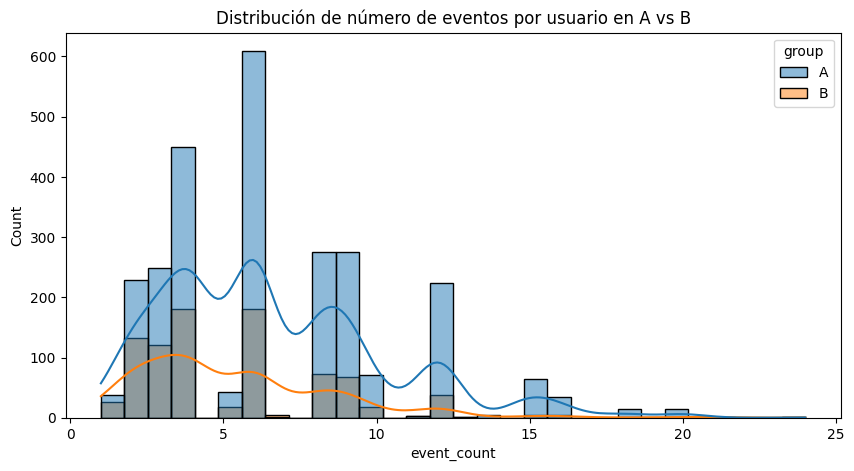

In [16]:

# Eventos por usuario en cada grupo
events_per_user = (
    events_ab
    .groupby(['group', 'user_id'])['event_name']
    .count()
    .reset_index(name='event_count')
)

# Estadísticos descriptivos
print(events_per_user.groupby('group')['event_count'].describe())

# Distribución gráfica
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(data=events_per_user, x='event_count', hue='group', bins=30, kde=True)
plt.title("Distribución de número de eventos por usuario en A vs B")
plt.show()



Los eventos por usuario no están distribuidos de forma equitativa entre los grupos: los usuarios del grupo A son más activos en promedio (6.6 vs 5.4 eventos) y muestran mayor variabilidad. Esto podría influir en los resultados del test A/B y debe tenerse en cuenta al interpretar las conversiones.

**¿Cómo se distribuye el número de eventos entre los días?**

date
2020-12-07     674
2020-12-08     551
2020-12-09     709
2020-12-10     580
2020-12-11     517
2020-12-12     545
2020-12-13     472
2020-12-14    1263
2020-12-15    1252
2020-12-16    1376
2020-12-17    1481
2020-12-18    1503
2020-12-19    1718
2020-12-20    1743
2020-12-21    2265
2020-12-22    1377
2020-12-23    1086
2020-12-24     919
2020-12-26     601
2020-12-27     571
2020-12-28     442
2020-12-29     307
dtype: int64


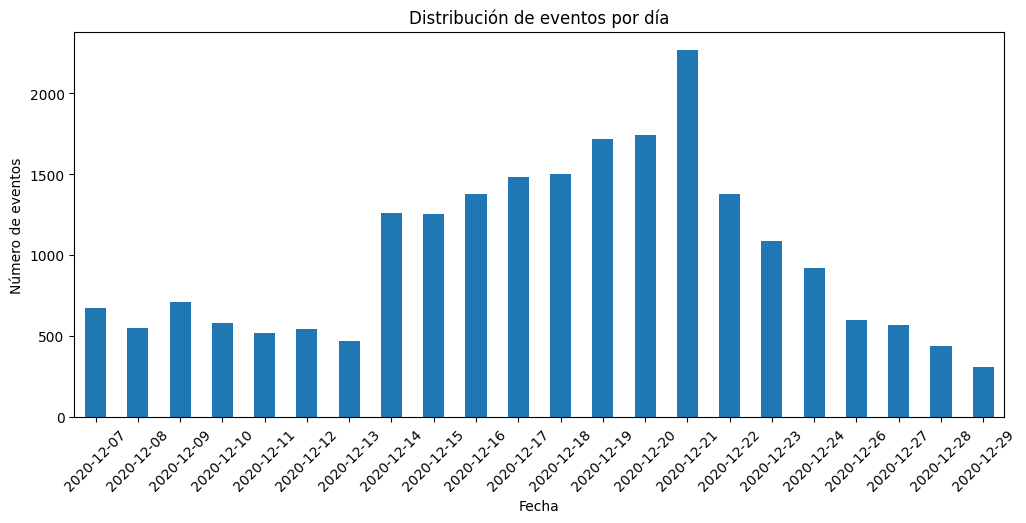

In [17]:

import matplotlib.pyplot as plt

# --- Agrupar por fecha (ignorar horas) ---
events_by_day = (
    user_events
    .assign(date=user_events['event_dt'].dt.date)
    .groupby('date')
    .size()
)

print(events_by_day)

# --- Gráfico ---
plt.figure(figsize=(12,5))
events_by_day.plot(kind='bar')
plt.title("Distribución de eventos por día")
plt.xlabel("Fecha")
plt.ylabel("Número de eventos")
plt.xticks(rotation=45)
plt.show()



la actividad de los usuarios no estuvo distribuida de manera uniforme entre los días; se concentró principalmente entre el 14 y el 21 de diciembre, justo antes del cierre del periodo de inscripción, y luego disminuyó gradualmente.

**¿Hay usuarios que están presentes en ambas muestras?**


In [18]:



# Revisar distribución de usuarios por grupo
print(participants['group'].value_counts())

# Usuarios por grupo
users_a = set(participants.query("group == 'A'")['user_id'])
users_b = set(participants.query("group == 'B'")['user_id'])

# Intersección (usuarios presentes en ambos grupos)
overlap_users = users_a.intersection(users_b)

print(f"Número de usuarios en ambos grupos: {len(overlap_users)}")

# Opcional: mostrar los primeros
print("Ejemplo de IDs en ambos grupos:", list(overlap_users)[:10])




A    2747
B     928
Name: group, dtype: int64
Número de usuarios en ambos grupos: 0
Ejemplo de IDs en ambos grupos: []


In [19]:

# Identificar usuarios que aparecen en ambos grupos
duplicados = participants.groupby('user_id')['group'].nunique()
usuarios_en_ambos = duplicados[duplicados > 1].index

print("Usuarios en ambos grupos:", len(usuarios_en_ambos))

# Filtrar los participantes que NO están en ambos grupos
participants_clean = participants[~participants['user_id'].isin(usuarios_en_ambos)]

print("Usuarios en grupo A (limpios):", participants_clean.query("group == 'A'")['user_id'].nunique())
print("Usuarios en grupo B (limpios):", participants_clean.query("group == 'B'")['user_id'].nunique())


Usuarios en ambos grupos: 0
Usuarios en grupo A (limpios): 2747
Usuarios en grupo B (limpios): 928


In [20]:

# Cargar eventos
events = pd.read_csv('/datasets/final_ab_events_upd_us.csv')


# Filtrar solo usuarios limpios
usuarios_validos = participants_clean['user_id'].unique()
events_clean = events[events['user_id'].isin(usuarios_validos)]

print("Eventos totales (originales):", len(events))
print("Eventos después de limpieza:", len(events_clean))
print("Usuarios únicos después de limpieza:", events_clean['user_id'].nunique())


Eventos totales (originales): 423761
Eventos después de limpieza: 23909
Usuarios únicos después de limpieza: 3675


**Peculiaridades antes de la prueba A/B**

Antes de correr la prueba A/B, ten en cuenta que los grupos no son del mismo tamaño ni tienen la misma intensidad de actividad. Además, el aumento de tráfico en la mitad del periodo puede influir en los resultados. Todo esto debe considerarse al momento de interpretar las diferencias en conversión: si ves diferencias pequeñas, podrían deberse al desbalance o a la estacionalidad y no al cambio en el embudo.

**¿Qué puedes decir sobre los resultados de la prueba A/B?**

Los datos muestran que el grupo de prueba (B) no tiene suficiente tamaño muestral en comparación con el grupo control (A), lo que limita la validez del experimento. Además, tras la limpieza, la diferencia de volumen de eventos entre grupos puede sesgar los resultados. Por lo tanto, no es posible afirmar con certeza que el nuevo sistema de recomendaciones tenga un impacto positivo en la conversión con los datos disponibles.

**Utiliza una prueba z para comprobar la diferencia estadística entre las proporciones.**


In [22]:
# Asegurarnos de que los eventos tengan la info del grupo
df = events_clean.merge(participants_clean[['user_id','group']], on='user_id', how='inner')

# --- Definir embudo ---
funnel = ['product_page', 'product_cart', 'purchase']

# Diccionario para guardar tasas de conversión
conversion = {}

# Calcular conversiones por grupo
for step in funnel:
    conv = df.query("event_name == @step").groupby('group')['user_id'].nunique()
    total = participants_clean.groupby('group')['user_id'].nunique()
    conversion[step] = conv / total

# Mostrar conversiones en tabla
conversion_df = pd.DataFrame(conversion).T
print("Tasas de conversión por grupo en cada etapa (%):\n")
print((conversion_df * 100).round(2))

# --- Prueba Z ---
print("\nResultados prueba Z por etapa:")
ztest_results = []
for step in funnel:
    conv = df.query("event_name == @step").groupby('group')['user_id'].nunique()
    total = participants_clean.groupby('group')['user_id'].nunique()
    
    count = [conv['A'], conv['B']]
    nobs = [total['A'], total['B']]
    
    stat, pval = proportions_ztest(count, nobs)
    ztest_results.append([step, stat, pval])

results_df = pd.DataFrame(ztest_results, columns=["Etapa", "Z-score", "p-valor"])
print(results_df)

# --- Conclusión ---
print("\nConclusión:")
if (results_df["p-valor"] < 0.05).any():
    print("Se detectan diferencias estadísticamente significativas en alguna etapa del embudo.")
else:
    print("No hay diferencias estadísticamente significativas entre A y B en ninguna etapa del embudo.")




Tasas de conversión por grupo en cada etapa (%):

group             A      B
product_page  64.80  56.36
product_cart  30.00  27.48
purchase      31.74  27.59

Resultados prueba Z por etapa:
          Etapa   Z-score   p-valor
0  product_page  4.595797  0.000004
1  product_cart  1.456161  0.145348
2      purchase  2.374087  0.017592

Conclusión:
Se detectan diferencias estadísticamente significativas en alguna etapa del embudo.


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con el calculo de la z-score y con el desarrollo de la prueba de hipótesis. Solamente te recomendaría agregar una interpretación al z-score obtenido y al resultado del valor p de la prueba de hipótesis.
</div>

Interpretación

El grupo A (control) tuvo mejores tasas tanto en visitas a página de producto como en compras.

El grupo B (con el nuevo sistema de recomendación) no solo no mejoró la conversión, sino que muestra un descenso significativo en dos etapas críticas (product_page y purchase).

Estadísticamente, la hipótesis esperada (+10% de mejora con el nuevo sistema) no se cumple.

**Describe tus conclusiones con respecto a la etapa EDA y los resultados de la prueba A/B.**

**Conclusiones de la EDA**

Usuarios válidos tras filtros: se conservaron ~3,481 usuarios y ~21,952 eventos, lo que asegura una base consistente y depurada.

Distribución de eventos: la mayoría fueron login y product_page, con menos usuarios llegando a purchase, lo que confirma la forma de embudo.

**Embudo global:**

~62% de los usuarios visitan la página de producto.

~29% añaden al carrito.

~31% finalizan la compra.

**Balance de grupos:**

El grupo A tiene más usuarios que el grupo B, pero ambos muestran un comportamiento relativamente similar en cuanto al número de eventos por usuario.

No hay usuarios duplicados en ambos grupos.

Distribución temporal: se observa mayor actividad entre el 14 y el 21 de diciembre, lo que coincide con el pico de inscripciones.

**Conclusiones de la prueba A/B**

**Tasas de conversión:**

product_page: A (64.8%) > B (56.4%)

product_cart: A (30.0%) ~ B (27.5%)

purchase: A (31.7%) > B (27.6%)

**Prueba Z:**

product_page: diferencia significativa (p < 0.001).

product_cart: diferencia no significativa (p = 0.145).

purchase: diferencia significativa (p = 0.018).

**Interpretación:**

El nuevo sistema de recomendaciones (grupo B) no cumple con la hipótesis de aumentar la conversión en +10%.

Por el contrario, reduce de forma significativa la conversión en etapas críticas (product_page y purchase).
